## Linear & Ridge Regression

This notebook contains the linear regression classifier and the Ridge regression classifier, which are 'trained' with the full dataset (i.e. no dimension reduction has been performed).

In [1]:
# Imported libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import block_diag

In [2]:
# Loading in 2000 raw image files, which are encoded as row-vectors of size 240.
mfeat_pix = np.loadtxt("./mfeat-pix.txt")

# This for loop is the Python version of the analogous algorithm in the Matlab demo.
images = []   # for storing the images 
for i in range(0, 10):
    for j in range(0, 10):
        pic = mfeat_pix[200*i+j, :]   # sectioning off each digit class
        picmatreverse = np.zeros((15, 16))
        picmatreverse = -np.reshape(pic, (16, 15)).T
        picmat = np.zeros((15, 16))
        for k in range(0, 15):
            picmat[:, k] = picmatreverse[:, 15-k]
        images.append(picmat.T)

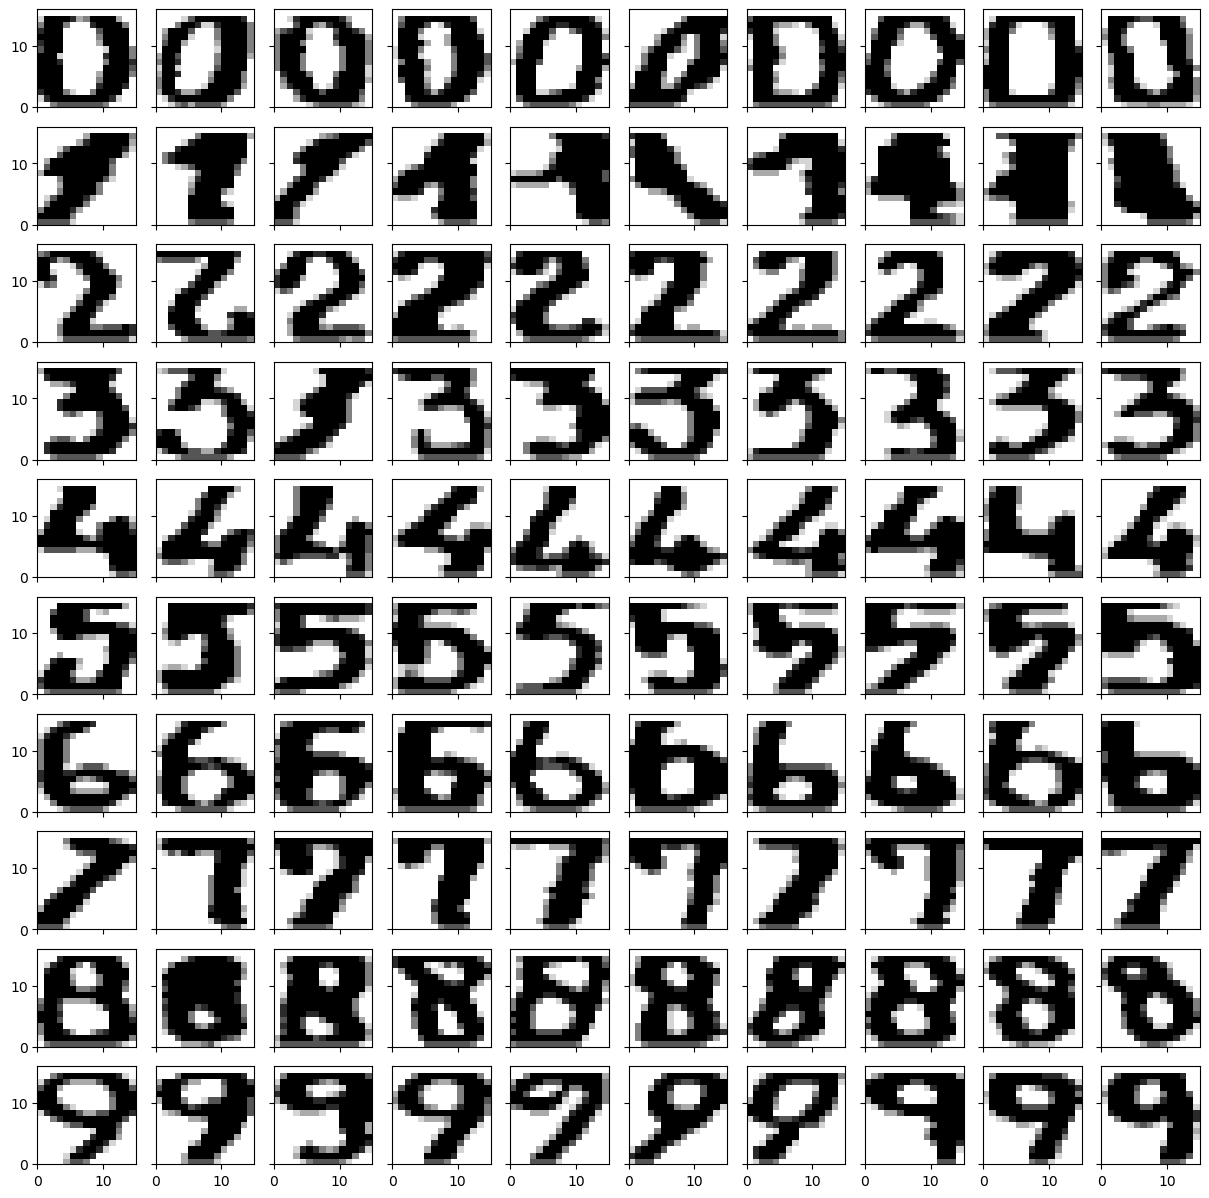

In [3]:
# Plotting the first 10 images of each digit class.
figs, subplots = plt.subplots(10, 10, sharex=True, sharey=True, figsize=(15, 15))
for i in range(0, 10):
    for j in range(0, 10):
        subplots[i, j].pcolor(images[i*10+j], cmap="gray")
plt.show()

In [4]:
# Splitting the data into a training and testing dataset.
trainPatterns = np.concatenate((mfeat_pix[0:100], mfeat_pix[200:300], 
                               mfeat_pix[400:500], mfeat_pix[600:700],
                               mfeat_pix[800:900], mfeat_pix[1000:1100],
                               mfeat_pix[1200:1300], mfeat_pix[1400:1500],
                               mfeat_pix[1600:1700], mfeat_pix[1800:1900]))

testPatterns = np.concatenate((mfeat_pix[100:200], mfeat_pix[300:400], 
                               mfeat_pix[500:600], mfeat_pix[700:800],
                               mfeat_pix[900:1000], mfeat_pix[1100:1200],
                               mfeat_pix[1300:1400], mfeat_pix[1500:1600],
                               mfeat_pix[1700:1800], mfeat_pix[1900:2000]))

In [5]:
# Create indicator matrices size 10 x 1000 with the class labels coded by binary indicator vectors.
b = np.array([1]*100)

trainLabels = block_diag(b, b, b, b, b, b, b, b, b, b)
padding = np.zeros((230, 1000))

# Defining matrix of size (240, 1000) with binary vectors indicating correct class label.
trainLabels = np.concatenate((trainLabels, padding), axis=0)
testLabels = trainLabels

# Create a row vector of correct class labels (from 0 ... 9 for the 10 classes). 
# This vector is the same for training and testing.
correctLabels = np.concatenate((b*0, b, b*2, b*3, b*4, b*5, b*6, b*7, b*8, b*9))

In [6]:
# Defining some useful function(s).

def convert_to_images(data, indices, shape=(15, 16)):
    
    images = []
    for i in indices:
        pic = data[i]
        picmatreverse = np.zeros(shape)
        picmatreverse = -np.reshape(pic, (shape[1], shape[0])).T
        picmat = np.zeros(shape)
        for k in range(0, shape[0]):
            picmat[:, k] = picmatreverse[:, shape[0]-k]
        images.append(picmat.T)
        
    return images

def plot_images(images, indices, rows=5, columns=10, figsize=(15, 15)):
    figs, subplots = plt.subplots(rows, columns, sharex=True, sharey=True, figsize=figsize)
    
    for i in range(0, rows):
        for j in range(0, columns):
            subplots[i, j].pcolor(images[i*columns+j], cmap="gray")
            correctLabel = correctLabels[indices[i*columns+j]] 
            assignedLabel = maxIndicesTest[indices[i*columns+j]]
            subplots[i, j].set_title("C: {}; A: {}".format(correctLabel, assignedLabel))

    plt.show()

## Linear Regression

In [7]:
# Compute linear regression weights W using the definition from the lecture notes, 
# where X = trainPatterns.T (shape: 240, 1000).
A = np.linalg.inv(trainPatterns.T @ trainPatterns)
W = (A @ trainPatterns.T @ trainLabels.T).T   # shape: (240, 240)

In [8]:
# Compute train misclassification rate.
classificationHypothesesTrain = W @ trainPatterns.T

maxValues = np.max(classificationHypothesesTrain, axis=0)
maxIndicesTrain = np.argmax(classificationHypothesesTrain, axis=0)

nrOfMisclassificationsTrain = np.sum(correctLabels != maxIndicesTrain)
train_miss_rate = (nrOfMisclassificationsTrain/1000)*100

print("Train misclassification rate: {:.2f}%".format(train_miss_rate))

Train misclassification rate: 2.30%


In [9]:
# Compute test misclassification rate.
classificationHypothesesTest = W @ testPatterns.T

maxIndicesTest = np.argmax(classificationHypothesesTest, axis=0)

nrOfMisclassificationsTest = np.sum(correctLabels != maxIndicesTest)
test_miss_rate = (nrOfMisclassificationsTest/1000)*100

print("Test misclassification rate: {:.2f}%".format(test_miss_rate))

Test misclassification rate: 9.90%


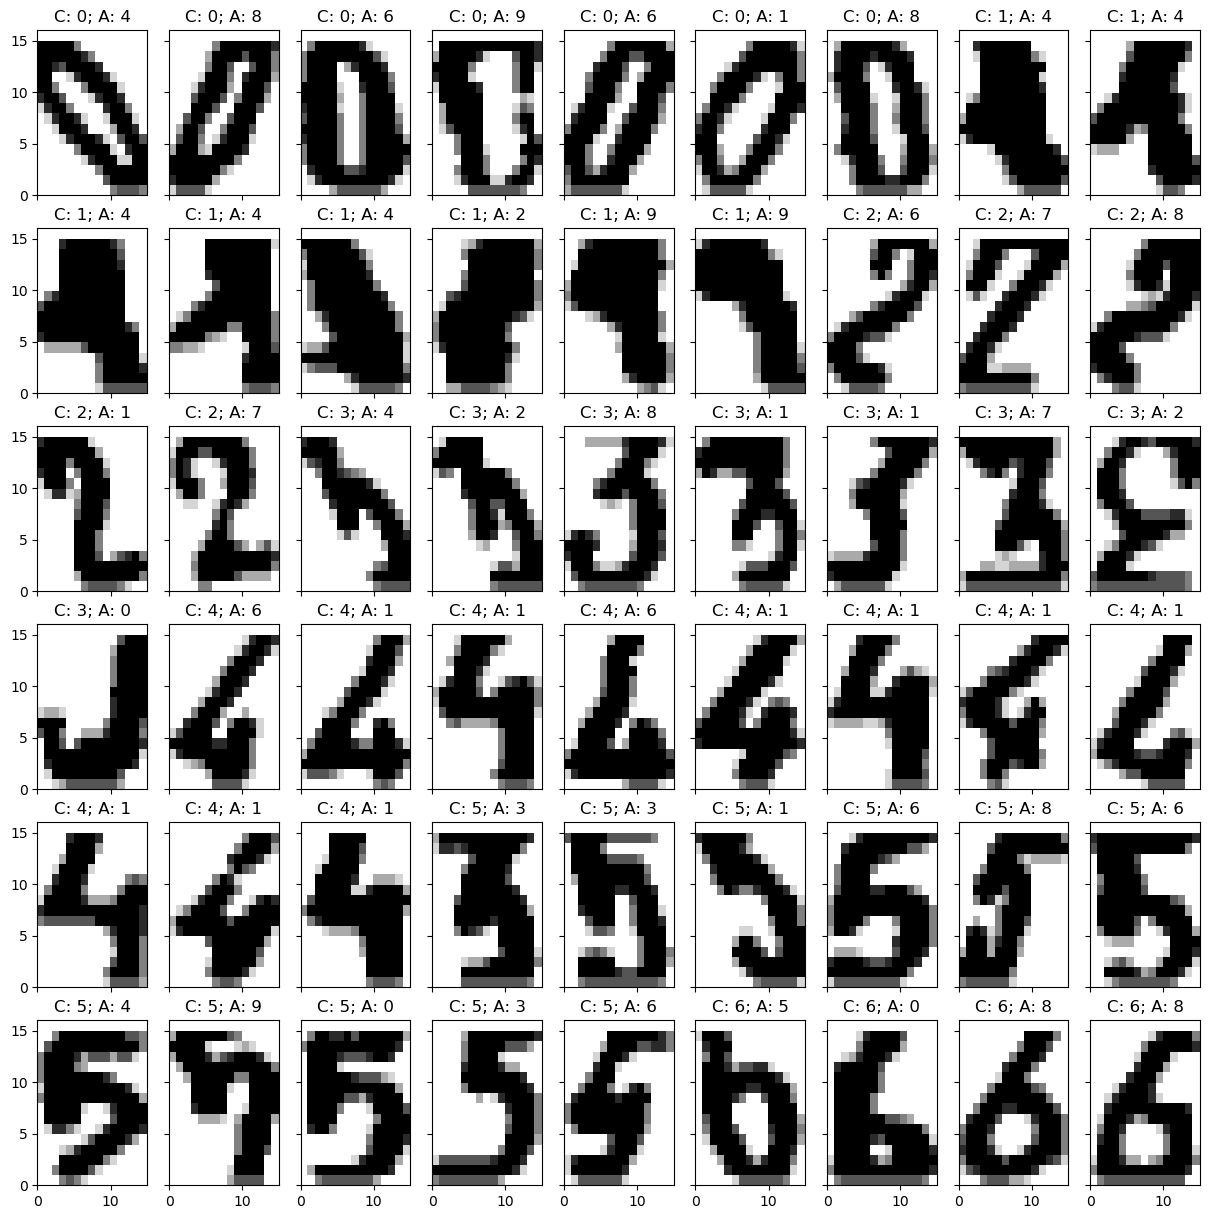

In [10]:
# Plotting some misclassified test images.

indMisclassifiedTest = np.where(correctLabels != maxIndicesTest)[0]

imagesMisclassifiedTest = convert_to_images(testPatterns, indMisclassifiedTest)

plot_images(imagesMisclassifiedTest, indMisclassifiedTest, rows=6, columns=9)

## Ridge Regression

In [11]:
# Now with basic ridge regression on raw pics.
alpha = 9000   # optimal regularization constant from 5-fold cross-validation
Wridge = (np.linalg.inv(trainPatterns.T @ trainPatterns + alpha*np.identity(240)) @ trainPatterns.T @ trainLabels.T).T

In [12]:
# Compute train misclassification rate.
classificationHypothesesTrain_ridge = Wridge @ trainPatterns.T

maxIndicesTrain = np.argmax(classificationHypothesesTrain_ridge, axis=0)
nrOfMisclassificationsTrain = np.sum(correctLabels != maxIndicesTrain)
train_miss_rate = (nrOfMisclassificationsTrain/1000)*100

print("Train misclassification rate (Ridge): {:.2f}%".format(train_miss_rate))

Train misclassification rate (Ridge): 5.30%


In [13]:
# Compute test misclassification rate.
classificationHypothesesTest_ridge = Wridge @ testPatterns.T

maxIndicesTest = np.argmax(classificationHypothesesTest_ridge, axis=0)
nrOfMisclassificationsTest = np.sum(correctLabels != maxIndicesTest)
test_miss_rate = (nrOfMisclassificationsTest/1000)*100

print("Test misclassification rate (Ridge): {:.2f}%".format(test_miss_rate))

Test misclassification rate (Ridge): 6.60%


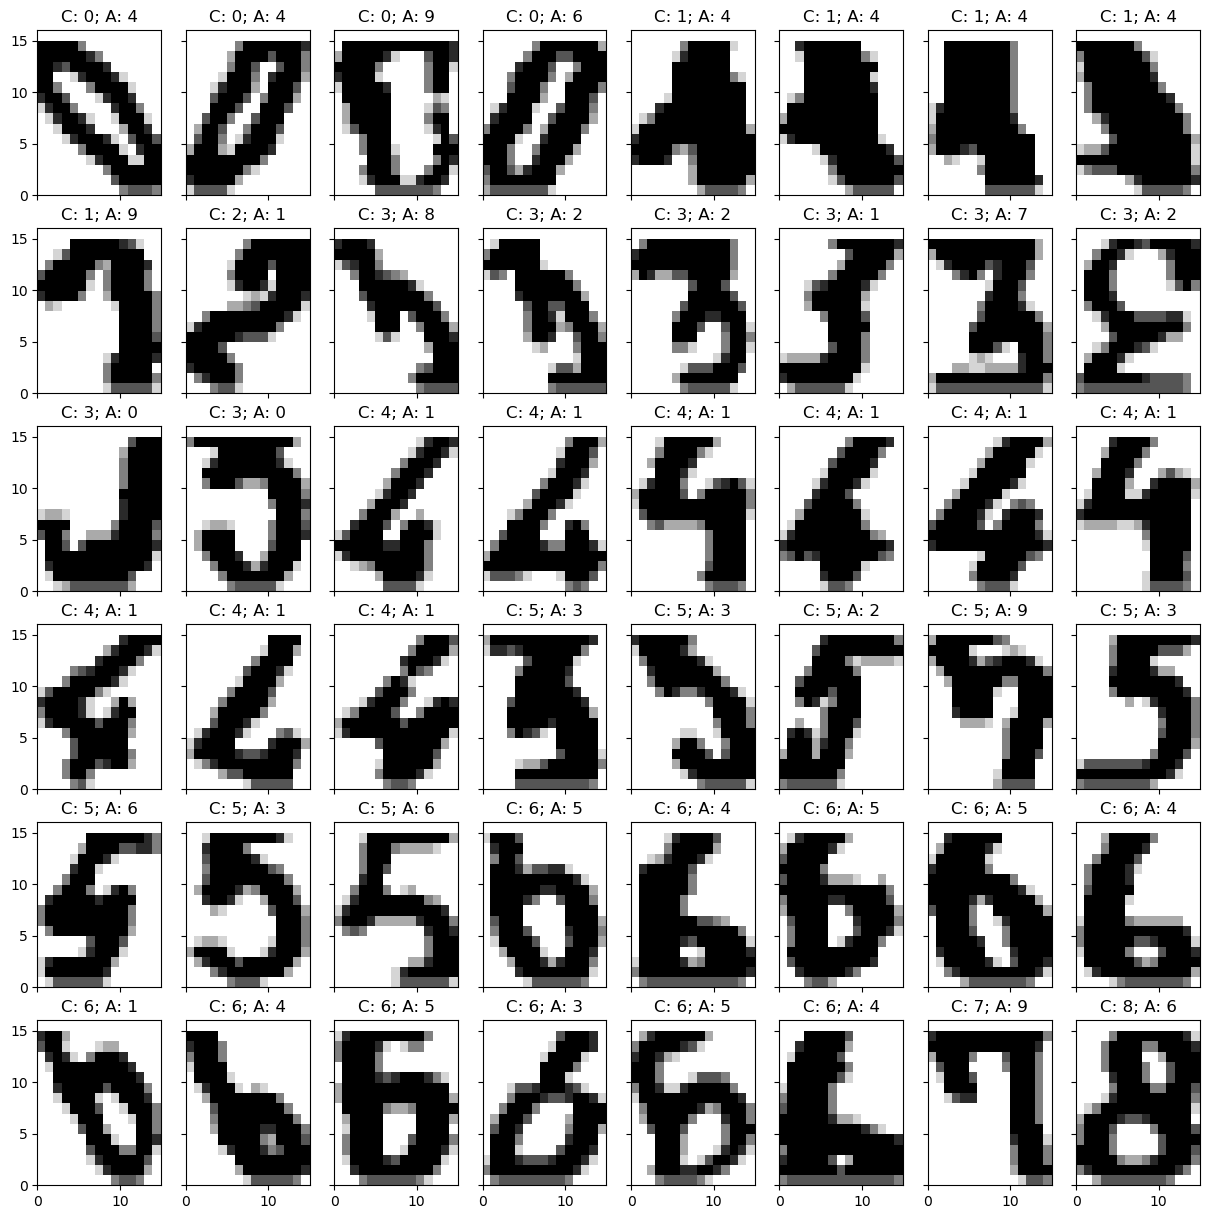

In [14]:
# Plotting some misclassified training images.

indMisclassifiedTest = np.where(correctLabels != maxIndicesTest)[0]

imagesMisclassifiedTest = convert_to_images(testPatterns, indMisclassifiedTest)

plot_images(imagesMisclassifiedTest, indMisclassifiedTest, rows=6, columns=8)

## Ridge Regression with Variable Regularization Constant

In [15]:
"""K-fold cross validation implementation [working]: the difficulty lies in maintaining the correct matrix structures
for trainLabels and correctLabels after splitting the training data into 5 folds, i.e. keeping an equal 80% of each digit
and use the remaining 20% for validation (whereas Kfold appears to split them up randomly)."""

# create indicator matrices size 10 x 1000 with the class labels coded by binary indicator vectors
b = np.array([1]*80)
trainLabels = block_diag(b, b, b, b, b, b, b, b, b, b)
padding = np.zeros((230, 800))

# Defining matrix of size (240, 800) with binary vectors indicating correct class label
trainLabels = np.concatenate((trainLabels, padding), axis=0)

# Create a row vector of correct class labels (from 0 ... 9 for the 10 classes). 
# This vector is only valid for the validation set.
b = np.array([1]*20)
correctLabels = np.concatenate((b*0, b, b*2, b*3, b*4, b*5, b*6, b*7, b*8, b*9))
#print(correctLabels)
#print(np.shape(correctLabels))

# Hard-coding the different train sets corresponding to each validation set in the 5-fold cross validation.
train_set1 = []
for i in range(0, 10):
    digit_set = trainPatterns[100*i+20:100*i+100, :]
    train_set1.append(digit_set)
train_set1 = np.concatenate((train_set1[0], train_set1[1], train_set1[2], train_set1[3], train_set1[4], train_set1[5],
                            train_set1[6], train_set1[7], train_set1[8], train_set1[9]))

train_set2 = []
for i in range(0, 10):
    digit_set1 = trainPatterns[100*i:100*i+20, :]
    digit_set2 = trainPatterns[100*i+40:100*i+100, :]
    digit_set = np.concatenate((digit_set1, digit_set2))
    train_set2.append(digit_set)
train_set2 = np.concatenate((train_set2[0], train_set2[1], train_set2[2], train_set2[3], train_set2[4], train_set2[5],
                            train_set2[6], train_set2[7], train_set2[8], train_set2[9]))

train_set3 = []
for i in range(0, 10):
    digit_set1 = trainPatterns[100*i:100*i+40, :]
    digit_set2 = trainPatterns[100*i+60:100*i+100, :]
    digit_set = np.concatenate((digit_set1, digit_set2))
    train_set3.append(digit_set)
train_set3 = np.concatenate((train_set3[0], train_set3[1], train_set3[2], train_set3[3], train_set3[4], train_set3[5],
                            train_set3[6], train_set3[7], train_set3[8], train_set3[9]))

train_set4 = []
for i in range(0, 10):
    digit_set1 = trainPatterns[100*i:100*i+60, :]
    digit_set2 = trainPatterns[100*i+80:100*i+100, :]
    digit_set = np.concatenate((digit_set1, digit_set2))
    train_set4.append(digit_set)
train_set4 = np.concatenate((train_set4[0], train_set4[1], train_set4[2], train_set4[3], train_set4[4], train_set4[5],
                            train_set4[6], train_set4[7], train_set4[8], train_set4[9]))

train_set5 = []
for i in range(0, 10):
    digit_set = trainPatterns[100*i:100*i+80, :]
    train_set5.append(digit_set)
train_set5 = np.concatenate((train_set5[0], train_set5[1], train_set5[2], train_set5[3], train_set5[4], train_set5[5],
                            train_set5[6], train_set5[7], train_set5[8], train_set5[9]))
    
train_sets = [train_set1, train_set2, train_set3, train_set4, train_set5]

# This for loop loops over all possible values for the constant alpha in the Ridge regression formula
# and we save the (mean) validation accuracies resulting from 5-fold cross validation.
val_accs = {}   # for storing the mean accuracies
val_accs_stds = {}   # for storing standard deviations of the mean accuracies
alphas = np.arange(0, 20000, 500)
no_folds = 5
for a in alphas:
    acc_per_fold = []
    for k in range(0, no_folds):
    
        train_set = train_sets[k]   # training set
    
        val_set = []   # validation set
        for i in range(0, 10):
            digit_set = trainPatterns[100*i+k*20:100*i+(k+1)*20, :]
            val_set.append(digit_set)
        val_set = np.concatenate((val_set[0], val_set[1], val_set[2], val_set[3], val_set[4], val_set[5],
                              val_set[6], val_set[7], val_set[8], val_set[9]))
    
        # Weight vector in Ridge regression.
        Wridge = (np.linalg.inv(train_set.T @ train_set + a*np.identity(240)) @ train_set.T @ trainLabels.T).T
    
        # Compute test misclassification rate.
        classificationHypothesesTest_ridge = Wridge @ val_set.T
        maxIndicesTest = np.argmax(classificationHypothesesTest_ridge, axis=0)
        #print(maxIndicesTest)
        nrOfMisclassificationsTest = np.sum(correctLabels != maxIndicesTest)
        test_acc = (1 - nrOfMisclassificationsTest/1000)*100   # saving as percentage
        acc_per_fold.append(test_acc)
    
    val_accs['{}'.format(a)] = np.mean(acc_per_fold)
    val_accs_stds['{}'.format(a)] = np.std(acc_per_fold)

#print(val_accs)
alpha_opt = max(val_accs, key=val_accs.get)
print("The highest validation accuracy of {:.1f}% corresponds to alpha = {}.".format(val_accs[alpha_opt], alpha_opt))

The highest validation accuracy of 98.6% corresponds to alpha = 9000.
